# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Problem---You-are-a-company-with-a-large-amount-of-data-and-contsrained-resources,-how-can-you-extract-value-from-data-efficiently?" data-toc-modified-id="Problem---You-are-a-company-with-a-large-amount-of-data-and-contsrained-resources,-how-can-you-extract-value-from-data-efficiently?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem - You are a company with a large amount of data and contsrained resources, how can you extract value from data efficiently?</a></div><div class="lev2 toc-item"><a href="#With-Apache-Spark" data-toc-modified-id="With-Apache-Spark-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>With Apache Spark</a></div><div class="lev1 toc-item"><a href="#Load-the-Citibike-data" data-toc-modified-id="Load-the-Citibike-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the Citibike data</a></div><div class="lev3 toc-item"><a href="#This-is-only-6-months-of-citibike-data----just-for-demonstrative-purposes" data-toc-modified-id="This-is-only-6-months-of-citibike-data----just-for-demonstrative-purposes-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>This is only 6 months of citibike data -- just for demonstrative purposes</a></div><div class="lev3 toc-item"><a href="#You-can-download-the-data-from:-https://www.citibikenyc.com/system-data" data-toc-modified-id="You-can-download-the-data-from:-https://www.citibikenyc.com/system-data-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>You can download the data from: <a href="https://www.citibikenyc.com/system-data" target="_blank">https://www.citibikenyc.com/system-data</a></a></div><div class="lev1 toc-item"><a href="#Get-the-data-ready" data-toc-modified-id="Get-the-data-ready-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data ready</a></div><div class="lev1 toc-item"><a href="#Simple-discriptive-statistics" data-toc-modified-id="Simple-discriptive-statistics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simple discriptive statistics</a></div><div class="lev3 toc-item"><a href="#Average-trip-duration" data-toc-modified-id="Average-trip-duration-401"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Average trip duration</a></div><div class="lev3 toc-item"><a href="#What-is-the-average-trip-time-for-different-genders?" data-toc-modified-id="What-is-the-average-trip-time-for-different-genders?-402"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>What is the average trip time for different genders?</a></div><div class="lev3 toc-item"><a href="#Let's-look-at-what-ridership-looks-like-throughout-the-day" data-toc-modified-id="Let's-look-at-what-ridership-looks-like-throughout-the-day-403"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Let's look at what ridership looks like throughout the day</a></div><div class="lev3 toc-item"><a href="#What-about-the-average-age-of-riders?" data-toc-modified-id="What-about-the-average-age-of-riders?-404"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>What about the average age of riders?</a></div><div class="lev1 toc-item"><a href="#What-start-station-was-used-the-most?" data-toc-modified-id="What-start-station-was-used-the-most?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What start station was used the most?</a></div><div class="lev3 toc-item"><a href="#You-can-also-write-SQL-queries-for-a-df!" data-toc-modified-id="You-can-also-write-SQL-queries-for-a-df!-501"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>You can also write SQL queries for a df!</a></div>

# Problem - You are a company with a large amount of data and contsrained resources, how can you extract value from data efficiently?

## With Apache Spark 


In [1]:
%matplotlib inline

In [2]:
import time
from io import StringIO
import requests
import json
import pandas as pd
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import mplleaflet
import geopandas as gp
import pysal
from pyspark.sql import functions as f
from pyspark.sql.types import *
from pyspark.sql import SQLContext, Row
import datetime
from pyspark.sql.functions import year, month, dayofmonth, hour, minute
from pyspark.sql.functions import lit
from pyspark.sql.functions import array
from pyspark.sql.functions import udf
from pyspark.sql.functions import struct
from pyspark.sql.functions import col
plt.style.use('fivethirtyeight')



In [4]:
#initialize spark context
sc

In [3]:
#create a spark sql context
sqlContext = SQLContext(sc)

# Load the Citibike data


### This is only 6 months of citibike data -- just for demonstrative purposes 

### You can download the data from: https://www.citibikenyc.com/system-data

In [5]:
#spark dataframe
citi_df = sqlContext.read.format('com.databricks.spark.csv')\
  .options(header='true', inferschema='true')\
  .load('citibike_rides.csv')



In [7]:
#open file as an RDD

t0 = time.time()
citibike = sc.textFile('citibike_rides.csv')

print (time.time()-t0)

0.0421390533447


In [5]:
#what does the data look like?
citibike.take(5)

[u'tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,day,date',
 u'1346,2015-01-01 00:01:00,2015-01-01 00:24:00,455,1 Ave & E 44 St,40.75001986,-73.96905301,265,Stanton St & Chrystie St,40.72229346,-73.99147535,18660,Subscriber,1960.0,2,3,1',
 u'363,2015-01-01 00:02:00,2015-01-01 00:08:00,434,9 Ave & W 18 St,40.74317449,-74.00366443,482,W 15 St & 7 Ave,40.73935542,-73.99931783,16085,Subscriber,1963.0,1,3,1',
 u'346,2015-01-01 00:04:00,2015-01-01 00:10:00,491,E 24 St & Park Ave S,40.74096374,-73.98602213,505,6 Ave & W 33 St,40.74901271,-73.98848395,20845,Subscriber,1974.0,1,3,1',
 u'182,2015-01-01 00:04:00,2015-01-01 00:07:00,384,Fulton St & Waverly Ave,40.68317813,-73.9659641,399,Lafayette Ave & St James Pl,40.68851534,-73.9647628,19610,Subscriber,1969.0,1,3,1']

In [8]:
print 'This file contains', citibike.count(), 'records'

This file contains 3379904 records


# Get the data ready

In order to analyze the data we need to skip the first row. 

In [9]:
#skip header
header = citibike.take(1)[0]
citibike = citibike.filter(lambda line: line != header)

In [10]:
citibike.take(1)

[u'1346,2015-01-01 00:01:00,2015-01-01 00:24:00,455,1 Ave & E 44 St,40.75001986,-73.96905301,265,Stanton St & Chrystie St,40.72229346,-73.99147535,18660,Subscriber,1960.0,2,3,1']

To really begin working with the data, you need to parse it into columns. By using the map transformation in Spark, we can apply a function to every element in our RDD. 
In this case we want to read our data file as a CSV formatted one. 

In [11]:
new_citibike = citibike.map(lambda x: x.split(","))
t0 = time.time()
head_rows = new_citibike.take(5)
tt = time.time() - t0
print "Parse completed in {} seconds".format(round(tt,3))


pprint(head_rows[0])


Parse completed in 0.065 seconds
[u'1346',
 u'2015-01-01 00:01:00',
 u'2015-01-01 00:24:00',
 u'455',
 u'1 Ave & E 44 St',
 u'40.75001986',
 u'-73.96905301',
 u'265',
 u'Stanton St & Chrystie St',
 u'40.72229346',
 u'-73.99147535',
 u'18660',
 u'Subscriber',
 u'1960.0',
 u'2',
 u'3',
 u'1']


# Simple discriptive statistics

### Average trip duration

In [13]:
#create a new rdd with the trip duration column
#python way of counting, start with zero
time= new_citibike.map(lambda x: int(x[0]))

In [14]:
#time is in seconds
time.take(1)

[1346]

In [15]:
#Similar to mapreduce, Spark is based on the concept of a key/value pair. 
#In the aggregation, the first accumulator element keeps the total sum, while the second element keeps the count. 
#Combining an accumulator with an RDD element consists in summing up the value and incrementing the count. 
#Combining two accumulators requires just a pairwise sum.

avg_time = time.aggregate((0,0), (lambda acc, value: (acc[0] + value, acc[1] + 1)), 
    (lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])))

print "Mean duration for a citibike trip is {} minutes".format(round((avg_time[0]/float(avg_time[1])/60),2))

Mean duration for a citibike trip is 14.72 minutes


### What is the average trip time for different genders?


In [16]:
# group gender the 14th value, and trip duration the 0th value
avg_time_gender_group = new_citibike.map(lambda x: (x[14], (int(x[0]), 1)))


In [17]:
# reduce the total times by key ie. 0, 1, or 2 (unknown, male, or female)
avg_time_gender_key = avg_time_gender_group.reduceByKey(lambda x1, x2: (x1[0] + x2[0], x1[1] + x2[1]))

In [18]:
#show example of what one group looks like
avg_time_gender_key.take(1)

[(u'0', (706431701, 386145))]

In [19]:
# calculate average trip duration for sexes 
# divide by 60 to get minutes
avg_times_genders = avg_time_gender_key.map(lambda c: (c[0], (round(float(c[1][0]/c[1][1]/60)))))

In [20]:
avg_times_genders.take(3)

[(u'0', 30.0), (u'2', 14.0), (u'1', 12.0)]

In [21]:
#create a list of the averages 
class_means = sorted(avg_times_genders.countByValue())

In [22]:
#extract the gender and avg time for the class_means list 
x1 = np.array([tup[0] for tup in class_means])
y1 =np.array([tup[1] for tup in class_means])

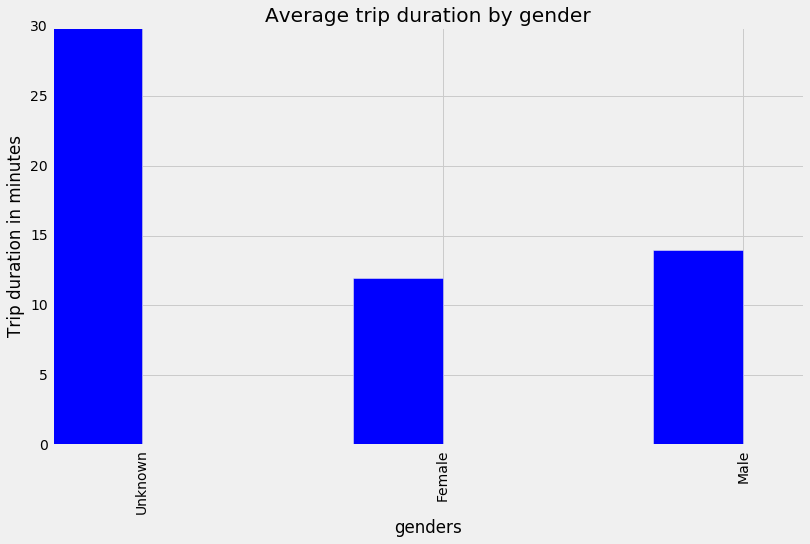

In [23]:
#visualize the means

N = 3
index = np.arange(3)  
gender_index = ['Unknown', 'Female', 'Male']
bar_width = 0.3
plt.bar(index, y1, bar_width)
plt.xlabel('genders')
plt.ylabel('Trip duration in minutes')
plt.title('Average trip duration by gender')
plt.xticks(index + bar_width, gender_index, rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()

### Let's look at what ridership looks like throughout the day

In [25]:
#select the starttime column
#make it a datetime object
#using df now and not the RDD
hours = citi_df.select(citi_df.starttime.cast("timestamp"))

In [26]:
#extract the hour from the starttime
hours = hours.select(hour('starttime').alias('hour'))

In [27]:
#the hours object is a df, and i want to sort it with the "countByValue" function which can only be used on rdds. 
rdd_hours = hours.rdd

In [28]:
#group the hour the trip started with how many other trips started at that same hour (0-23), and sort 
counts_by_class = sorted(rdd_hours.countByValue().items())

In [29]:
counts_by_class

[(Row(hour=0), 30458),
 (Row(hour=1), 17019),
 (Row(hour=2), 9829),
 (Row(hour=3), 6249),
 (Row(hour=4), 5925),
 (Row(hour=5), 19378),
 (Row(hour=6), 75571),
 (Row(hour=7), 152051),
 (Row(hour=8), 267468),
 (Row(hour=9), 217815),
 (Row(hour=10), 148557),
 (Row(hour=11), 154371),
 (Row(hour=12), 179074),
 (Row(hour=13), 190416),
 (Row(hour=14), 197220),
 (Row(hour=15), 204862),
 (Row(hour=16), 242649),
 (Row(hour=17), 340377),
 (Row(hour=18), 324180),
 (Row(hour=19), 223725),
 (Row(hour=20), 145421),
 (Row(hour=21), 99841),
 (Row(hour=22), 75665),
 (Row(hour=23), 51782)]

In [30]:
#extract the second elemment from the list and store it in the x2 variable
x2 = np.array([tup[1] for tup in counts_by_class])

In [31]:
#creat a df from that list
counts_df = pd.DataFrame(x2, columns=['count'])

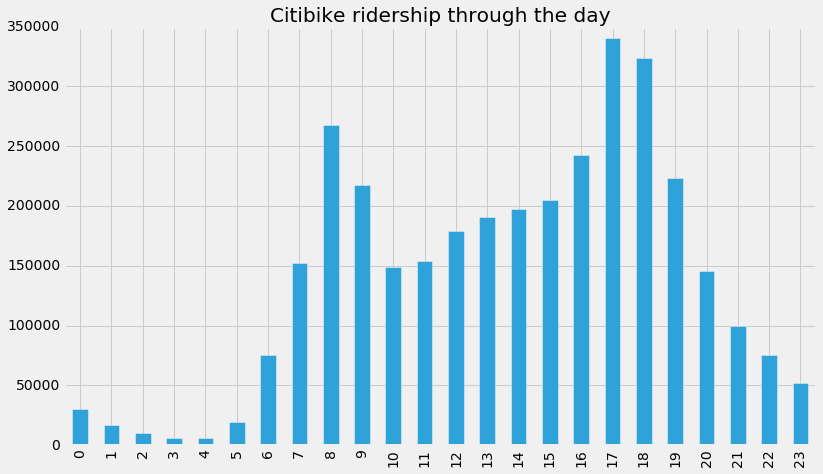

In [32]:
#visualize the results
fig = plt.figure()

counts_df.plot(kind = "bar", title = 'Citibike ridership through the day', legend=False)
fig = plt.gcf()
fig.set_size_inches(12, 7)

### What about the average age of riders?



In [33]:
citi_df.describe('birth_year').show()

+-------+------------------+
|summary|        birth_year|
+-------+------------------+
|  count|           2994994|
|   mean|1975.9210285563177|
| stddev|11.560499297018595|
|    min|            1885.0|
|    max|            1999.0|
+-------+------------------+



In [34]:
#create an age column in the df
citi_df = citi_df.withColumn('age', 2016-citi_df.birth_year)

In [35]:
citi_df.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|           2994994|
|   mean|40.078971443682356|
| stddev|11.560499297018584|
|    min|              17.0|
|    max|             131.0|
+-------+------------------+



# What start station was used the most?

In [36]:
#create an rdd for start staions 
station = new_citibike.map(lambda x: x[4])

In [37]:
#creates a tuple list of start station names and their counts
#sorts alphabetically
counts_by_station = sorted(station.countByValue().items())

In [38]:
#transform the list into an rdd, so we can move it to a df for visualization 
counts_by_station_rdd = sc.parallelize(counts_by_station)

In [39]:
#create df
count_table = sqlContext.createDataFrame(counts_by_station_rdd, ('start_station_name', 'count'))
count_table.show(5)

+------------------+-----+
|start_station_name|count|
+------------------+-----+
|   1 Ave & E 15 St|19612|
|   1 Ave & E 18 St| 5148|
|   1 Ave & E 30 St|13680|
|   1 Ave & E 44 St| 9334|
|  10 Ave & W 28 St|13717|
+------------------+-----+
only showing top 5 rows



In [40]:
#create a new rdd from the start station name, lon, lat from the main rdd
stations_w_coords = new_citibike.map(lambda x: (x[4], float(x[5]), float(x[6])))

In [41]:
#create a df from the previous rdd
station_coords_table = sqlContext.createDataFrame(stations_w_coords, ('start_station_name', 'lat', 'lon'))
station_coords_table.show(5)

+--------------------+-----------+------------+
|  start_station_name|        lat|         lon|
+--------------------+-----------+------------+
|     1 Ave & E 44 St|40.75001986|-73.96905301|
|     9 Ave & W 18 St|40.74317449|-74.00366443|
|E 24 St & Park Ave S|40.74096374|-73.98602213|
|Fulton St & Waver...|40.68317813| -73.9659641|
|     5 Ave & E 29 St| 40.7451677|-73.98683077|
+--------------------+-----------+------------+
only showing top 5 rows



In [42]:
#to visualize the results, lets combine the two dfs, so we have the coordinates
df = count_table.join(station_coords_table, on='start_station_name', how="left")

### You can also write SQL queries for a df!

In [43]:
#register the table 
df.registerTempTable('station_counts') 

In [44]:
#write the query
#save the results to a variable
query = """
select
 distinct(start_station_name), count, lat, lon 
 from station_counts
order by count desc
limit 30
"""
top_station = sqlContext.sql(query)
 

In [45]:
#after the SQL query, the file with almost 10 million records only has 30, so lets make this in to a pandas df so we can visualize the stations
top_station = top_station.toPandas()

In [46]:
top_station.head()

,start_station_name,count,lat,lon
0,8 Ave & W 31 St,39912,40.750450,-73.994811
1,8 Ave & W 31 St,39912,40.750967,-73.994442
2,8 Ave & W 31 St,39912,40.750967,-73.994442
3,Lafayette St & E 8 St,35557,40.730287,-73.990765
4,Pershing Square North,34330,40.751873,-73.977706


In [47]:
#i want to show this on a mplleaflet map, so i need to give the coordinates a geometry ie. point or polygon
#create a geometry column to see the stations on a map
top_station['geometry'] = top_station.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

In [48]:
top_station.head()

,start_station_name,count,lat,lon,geometry
0,8 Ave & W 31 St,39912,40.750450,-73.994811,POINT (-73.99481050999999 40.75044999)
1,8 Ave & W 31 St,39912,40.750967,-73.994442,POINT (-73.9944420755 40.7509673487)
2,8 Ave & W 31 St,39912,40.750967,-73.994442,POINT (-73.99444208 40.75096735)
3,Lafayette St & E 8 St,35557,40.730287,-73.990765,POINT (-73.9907647 40.73028666)
4,Pershing Square North,34330,40.751873,-73.977706,POINT (-73.977706 40.751873)


In [49]:
#export to a geopandas df
#this library gives elements in the df geographic properties
geo_df = gp.GeoDataFrame(top_station)

In [50]:
#give the geometry coordinate reference system -- crs
epsg4326 = {'init': 'epsg:4326'}
geo_df.crs = epsg4326
geo_df = geo_df.to_crs(epsg=2263)

In [51]:
#apply a buffer to the geometries to make them easier to see
geo_df['geometry'] = geo_df.geometry.buffer(300)

In [52]:
geo_df.head(9)

,start_station_name,count,lat,lon,geometry
0,8 Ave & W 31 St,39912,40.750450,-73.994811,"POLYGON ((985987.8571738678 212685.8750825603,..."
1,8 Ave & W 31 St,39912,40.750967,-73.994442,"POLYGON ((986089.9277289166 212874.3718045811,..."
2,8 Ave & W 31 St,39912,40.750967,-73.994442,"POLYGON ((986089.9264820763 212874.3722781346,..."
3,Lafayette St & E 8 St,35557,40.730287,-73.990765,"POLYGON ((987109.6082826314 205339.8267585847,..."
4,Pershing Square North,34330,40.751873,-73.977706,"POLYGON ((990726.8888201718 213205.0669894417,..."
5,W 21 St & 6 Ave,32729,40.741740,-73.994156,"POLYGON ((986169.5365540914 209512.4453977407,..."
6,E 17 St & Broadway,32003,40.737050,-73.990093,"POLYGON ((987295.5056108615 207803.8857593223,..."
7,West St & Chambers St,27469,40.717548,-74.013221,"POLYGON ((980885.1210736979 200699.0049358674,..."
8,8 Ave & W 33 St,27128,40.751551,-73.993934,"POLYGON ((986230.684896044 213087.0241532385, ..."


In [57]:
#plot the results for top 30 stations with mplleaflet
geo_df.plot(column='count', k=5, alpha=0.5)
mplleaflet.display(crs=geo_df.crs)
